In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/spotify.csv')
df.shape

(114000, 21)

Dataset from kaggle: https://www.kaggle.com/datasets/thedevastator/spotify-tracks-genre-dataset/data

In [3]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.tail()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music
113999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,...,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music


In [5]:
df.loc[300] #tester for test.py

Unnamed: 0                                  300
track_id                 2C9ePPz58he8jmYEod9pvT
artists                         Callum J Wright
album_name          Isn't She Lovely (Acoustic)
track_name          Isn't She Lovely - Acoustic
popularity                                   54
duration_ms                              145771
explicit                                  False
danceability                               0.69
energy                                    0.306
key                                           9
loudness                                 -9.193
mode                                          1
speechiness                              0.0356
acousticness                              0.805
instrumentalness                            0.0
liveness                                 0.0968
valence                                   0.424
tempo                                   115.671
time_signature                                4
track_genre                            a

# EDA and data pre-processing

- Check and fix dtypes
- Check and fix null values
- Stats for numerical columns
- Subset data for use with prophet
- Visualize

In [6]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [7]:
df = df.drop(["Unnamed: 0", "track_id"], axis = 1)
df

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

In [9]:
df["explicit"] = df["explicit"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  int64  
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

In [10]:
df.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [11]:
df = df.dropna() #deleting the few small null raws
df.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [12]:
df.dtypes

artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [13]:
# stats for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,113999.0,33.238827,22.304959,0.000,17.0000,35.000000,50.0000,100.000
duration_ms,113999.0,228031.153387,107296.057716,8586.000,174066.0000,212906.000000,261506.0000,5237295.000
explicit,113999.0,0.085501,0.279627,0.000,0.0000,0.000000,0.0000,1.000
danceability,113999.0,0.566801,0.173543,0.000,0.4560,0.580000,0.6950,0.985
energy,113999.0,0.641383,0.251530,0.000,0.4720,0.685000,0.8540,1.000
key,113999.0,5.309126,3.559999,0.000,2.0000,5.000000,8.0000,11.000
loudness,113999.0,-8.258950,5.029357,-49.531,-10.0130,-7.004000,-5.0030,4.532
mode,113999.0,0.637558,0.480708,0.000,0.0000,1.000000,1.0000,1.000
speechiness,113999.0,0.084652,0.105733,0.000,0.0359,0.048900,0.0845,0.965
acousticness,113999.0,0.314907,0.332522,0.000,0.0169,0.169000,0.5975,0.996


In [14]:
strings = list(df.dtypes[df.dtypes == 'object'].index) #ottengo gli indici che hanno solo valori string
strings

['artists', 'album_name', 'track_name', 'track_genre']

<AxesSubplot:xlabel='danceability', ylabel='Count'>

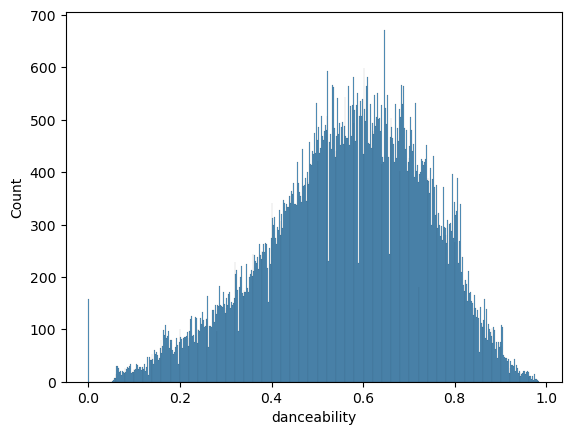

In [15]:
sns.histplot(df.danceability, bins=500)

<AxesSubplot:xlabel='energy', ylabel='Count'>

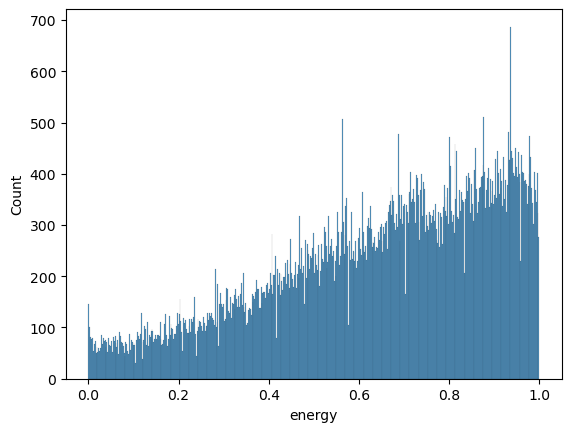

In [16]:
sns.histplot(df.energy, bins=500)

<AxesSubplot:xlabel='liveness', ylabel='Count'>

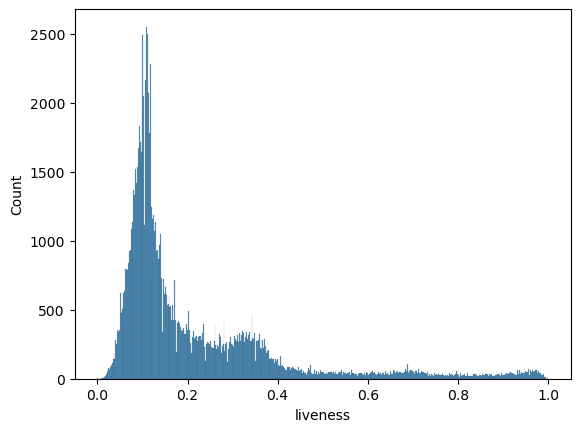

In [17]:
sns.histplot(df.liveness, bins=500)

<AxesSubplot:xlabel='loudness', ylabel='Count'>

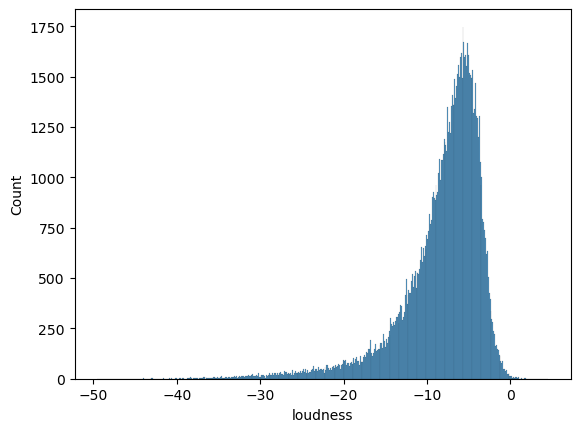

In [18]:
sns.histplot(df.loudness, bins=500)

<AxesSubplot:xlabel='tempo', ylabel='Count'>

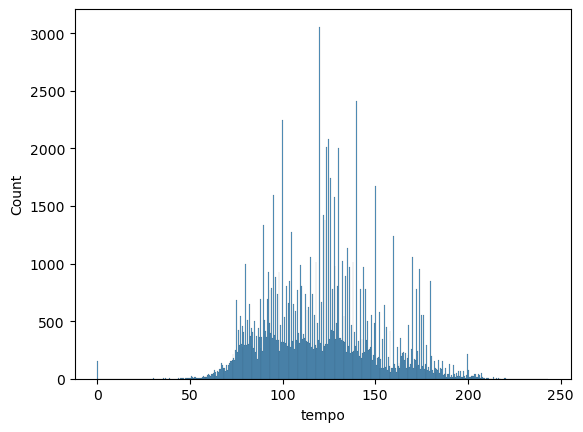

In [19]:
sns.histplot(df.tempo, bins=500)

<AxesSubplot:xlabel='valence', ylabel='Count'>

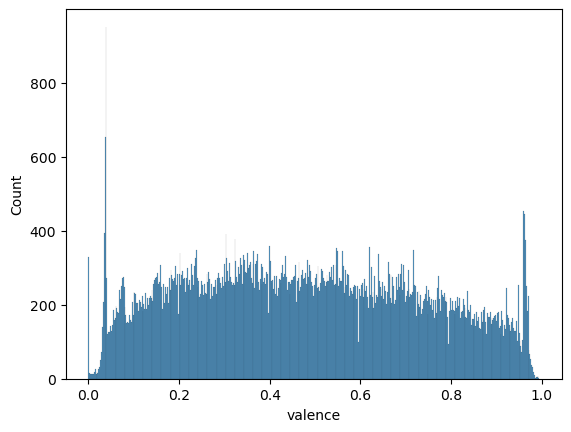

In [20]:
sns.histplot(df.valence, bins=500)

<AxesSubplot:xlabel='acousticness', ylabel='Count'>

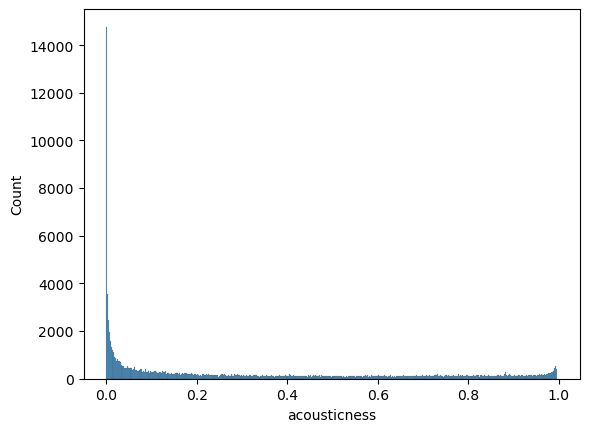

In [21]:
sns.histplot(df.acousticness, bins=500)

<AxesSubplot:xlabel='duration_ms', ylabel='Count'>

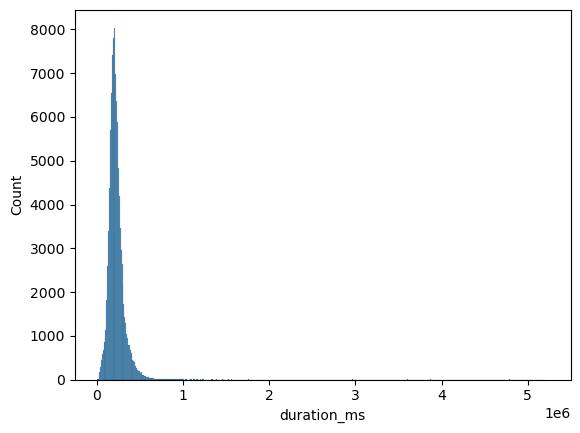

In [22]:
sns.histplot(df.duration_ms, bins=500)

In [23]:
df['duration_ms'] = np.log1p(df['duration_ms'])

/tmp/ipykernel_2800/3949653695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_ms'] = np.log1p(df['duration_ms'])


<AxesSubplot:xlabel='duration_ms', ylabel='Count'>

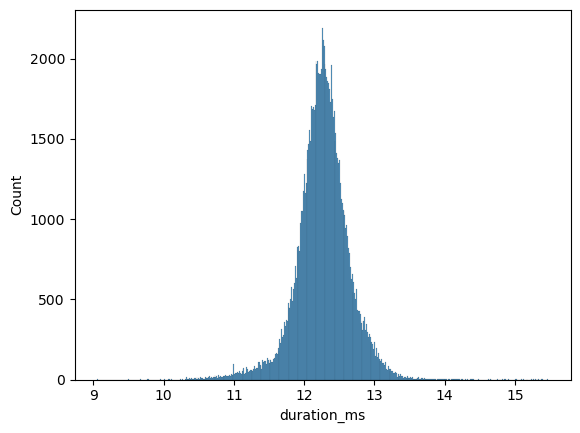

In [24]:
sns.histplot(df.duration_ms, bins=500)

In [25]:
df.track_genre.unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [26]:
for col in strings: #loop per ogni colonna
    df[col] = df[col].str.lower()

/tmp/ipykernel_2800/52875821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.lower()


In [27]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5]) #stampo solo i primi 5 valori diversi
    print(df[col].nunique())
    print()

artists
['gen hoshino' 'ben woodward' 'ingrid michaelson;zayn' 'kina grannis'
 'chord overstreet']
31429

album_name
['comedy' 'ghost (acoustic)' 'to begin again'
 'crazy rich asians (original motion picture soundtrack)' 'hold on']
46155

track_name
['comedy' 'ghost - acoustic' 'to begin again' "can't help falling in love"
 'hold on']
72396

popularity
[73 55 57 71 82]
101

duration_ms
[12.34873039 11.91579387 12.25879317 12.21569619 12.20032617]
50696

explicit
[0 1]
2

danceability
[0.676 0.42  0.438 0.266 0.618]
1174

energy
[0.461  0.166  0.359  0.0596 0.443 ]
2083

key
[ 1  0  2  6 11]
12

loudness
[ -6.746 -17.235  -9.734 -18.515  -9.681]
19480

mode
[0 1]
2

speechiness
[0.143  0.0763 0.0557 0.0363 0.0526]
1489

acousticness
[0.0322 0.924  0.21   0.905  0.469 ]
5061

instrumentalness
[1.01e-06 5.56e-06 0.00e+00 7.07e-05 2.89e-06]
5346

liveness
[0.358  0.101  0.117  0.132  0.0829]
1722

valence
[0.715 0.267 0.12  0.143 0.167]
1790

tempo
[ 87.917  77.489  76.332 181.74  119.949]

# Splitting the Data

In [28]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [29]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [30]:
len(df_train), len(df_test), len(df_val)

(68399, 22800, 22800)

In [31]:
y_train = df_train.popularity
y_val = df_val.popularity
y_test = df_test.popularity
y_full_train = df_full_train.popularity

In [32]:
del df_train['popularity']
del df_val['popularity']
del df_test['popularity']
del df_full_train['popularity']

In [33]:
def rmse(y, y_pred):
    error = y - y_pred #calcolo errore tra i 2 array
    se = error **2 #quadrato della differenza
    mse = se.mean() #media della differenza
    return np.sqrt(mse) #radice del valore medio

# DECISION TREES

In [34]:
#train
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
#val
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)
#ft
#train
dicts_ft = df_full_train.to_dict(orient='records')
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(dicts_ft)
#test
dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [35]:
scores = []

for d in [1,10,50, None]: 
    for s in [1,100,500]: 
        dt = DecisionTreeRegressor( max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict(X_val)
        _rmse = rmse(y_val, y_pred)
        scores.append((d,s,_rmse))
        print((d,s,_rmse))
col = ['max_depth', 'min_samples_leaf', 'rmse']
df_scores = pd.DataFrame(scores, columns=col)
df_scores

(1, 1, 22.076826129624493)
(1, 100, 22.076826129624493)
(1, 500, 22.076826129624493)
(10, 1, 20.996694549115592)
(10, 100, 21.034734758465678)
(10, 500, 21.06316166225377)
(50, 1, 19.12854077047366)
(50, 100, 19.26074419219002)
(50, 500, 20.13630975687539)
(None, 1, 18.619343012322595)
(None, 100, 19.139181655263048)
(None, 500, 20.13630975687539)


,max_depth,min_samples_leaf,rmse
0,1.0,1,22.076826
1,1.0,100,22.076826
2,1.0,500,22.076826
3,10.0,1,20.996695
4,10.0,100,21.034735
5,10.0,500,21.063162
6,50.0,1,19.128541
7,50.0,100,19.260744
8,50.0,500,20.136310
9,NaN,1,18.619343


In [36]:
df_scores.sort_values(by='rmse', ascending=True)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', 
                columns=['max_depth'],
                values=['rmse'])
df_scores_pivot.round(3)

rmse                        
max_depth            NaN    1.0     10.0    50.0
min_samples_leaf                                
1                 18.619  22.077  20.997  19.129
100               19.139  22.077  21.035  19.261
500               20.136  22.077  21.063  20.136

<AxesSubplot:xlabel='popularity', ylabel='Count'>

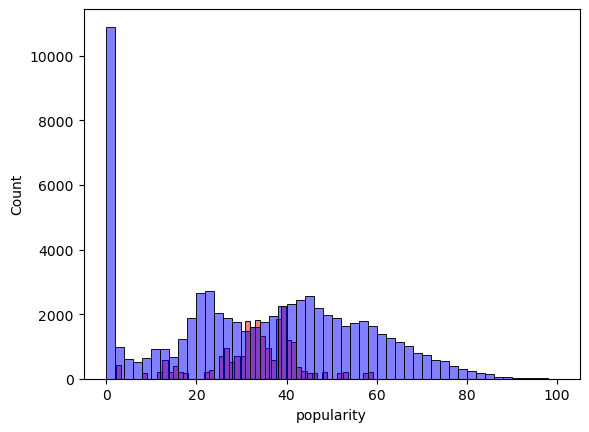

In [37]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50) #predictions
sns.histplot(y_train, color='blue', alpha=0.5, bins=50) #target values

# RANDOM FOREST

In [40]:
scores = []
for m in [50, 100]:
    rf = RandomForestRegressor(n_estimators=1, 
        max_depth=m,
        min_samples_leaf=1,
        random_state=1) 
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    _rmse = rmse(y_val, y_pred)
    scores.append((m, _rmse))

    print((m, _rmse))

(50, 19.652942815864268)
(100, 19.725144049876807)


In [35]:

model = DecisionTreeRegressor( max_depth=None, min_samples_leaf=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
_rmse = rmse(y_val, y_pred)
print(_rmse)

18.57627412928426


In [36]:

import pickle

output_file = 'song_model.bin'
with open(output_file, 'wb') as f_out: 
    pickle.dump((dv, model), f_out)